In [162]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
'''
Reading the MNIST/USPS Handwritten Digits Dataset
'''


def readData(fname='ZipDigits.train'):
    '''
    Input:
        fname: name of file containing N examples, each with d attributes
    Output:
        X: N x d+1 numpy array
        y: N x 1 numpy array
    '''
    with open(fname) as f:
        X = []
        y = []
        rlines = f.readlines()
        for line in rlines:
            row = line.rstrip().split(' ')
            yval = int(float(row[0]))
            y.append(yval)
            xvals = [float(pixel) for pixel in row[1:]]
            X.append(xvals)
        X = np.array(X)
        y = np.array(y)
        y = y.reshape((y.shape[0], 1))
        print(f'X shape: {X.shape}')
        print(f'y shape: {y.shape}')
        return X, y

In [163]:
'''
Read training and test datasets
'''
if True:
    Xdigitstrain, ydigitstrain = readData('ZipDigits.train')

    Ndigitstrain, pixels = Xdigitstrain.shape

    assert(Ndigitstrain == ydigitstrain.shape[0])

X shape: (7291, 256)
y shape: (7291, 1)


In [164]:
if True:
    Xdigitstest, ydigitstest = readData('ZipDigits.test')

    Ndigitstest, pixels = Xdigitstest.shape

    assert(Ndigitstest == ydigitstest.shape[0])

X shape: (2007, 256)
y shape: (2007, 1)


In [165]:
'''
Computing Features
'''


def computeIntensity(X):
    '''
    Compute the average intensity feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        intensities: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     average pixel intesity of the corresponding image
                     See LFD Example 3.1
    '''
    print('computing intensity feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    intensities = np.matmul(X, np.ones((d, 1)))/d
    print(f'Output shape {intensities.shape}')
    return intensities


def computeSymmetry(X):
    '''
    Compute the symmetry feature
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        symmetries: a 2 dimensional N x 1 numpy array
                     each row consists of a single value representing the
                     "horizontal" symmetry of the 16 x 16 image about the vertical axis
                     See LFD Example 3.1
    '''
    print('computing symmetry feature')
    N, d = X.shape
    print(f'Input shape {N}, {d}')
    Ximgs = [X[n, :].reshape((16, 16)) for n in range(N)]
    Ximgs_flipped = [np.flip(Ximgs[n], axis=1) for n in range(N)]
    symmetries = [np.sum(np.abs((Ximgs[n] - Ximgs_flipped[n])
                                ).reshape(256, ))/d for n in range(N)]
    symmetries = -np.array(symmetries)
    symmetries = symmetries.reshape(N, 1)
    print(f'Output shape {symmetries.shape}')
    return symmetries

In [166]:
'''
Computing the augmented feature matrix
'''


def computeAugmentedXWithFeatures(X):
    '''
    Compute the augmented feature matrix
    Input:
        X: a 2 dimensional N x 256 numpy array
           each row contains the values of 256 pixels from a 16 x 16 grayscale image of a handwritten digit
           each pixel has an intensity value between -1 and 1
    Output:
        Xaug: a 2 dimensional N x 3 numpy array
              the augmented feature matrix
              the i-th row corresponds to the i-th row of X (and image represented by it)
              the 0-th column is the column of 1s
              the 1-st column is the column of average intensities
              the 2-nd column is the column of horizontal symmetries
    '''
    N, d = X.shape
    intensity = computeIntensity(X)
    symmetry = computeSymmetry(X)
    dummy = np.ones((N, 1))
    Xaug = np.concatenate((dummy, intensity, symmetry), axis=1)
    print(f'Shape of augmented feature matrix: {Xaug.shape}')
    return Xaug

In [167]:
'''
Compute the augmented matrix with features
'''

if True:
    print('Computing augmented training feature matrix')

    Xaugtrain = computeAugmentedXWithFeatures(Xdigitstrain)

    Naugtrain, d = Xaugtrain.shape

    print('Computing augmented test feature matrix')

    Xaugtest = computeAugmentedXWithFeatures(Xdigitstest)

    Naugtest, d = Xaugtest.shape

Computing augmented training feature matrix
computing intensity feature
Input shape 7291, 256
Output shape (7291, 1)
computing symmetry feature
Input shape 7291, 256
Output shape (7291, 1)
Shape of augmented feature matrix: (7291, 3)
Computing augmented test feature matrix
computing intensity feature
Input shape 2007, 256
Output shape (2007, 1)
computing symmetry feature
Input shape 2007, 256
Output shape (2007, 1)
Shape of augmented feature matrix: (2007, 3)


In [168]:
Xaug = np.concatenate((Xaugtrain, Xaugtest), axis=0)
Naug, d = Xaug.shape
ycombined = np.concatenate((ydigitstrain, ydigitstest), axis=0)

assert(Xaug.shape[0] == Ndigitstrain + Ndigitstest)
assert(ycombined.shape[0] == Ndigitstrain + Ndigitstest)

print(f'Xaug shape {Xaug.shape}, ycombined shape {ycombined.shape}')

Xaug shape (9298, 3), ycombined shape (9298, 1)


In [169]:
def normalize_column(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)
    norm_arr = t_min + ((arr - np.min(arr)) * (diff) / (diff_arr))
    print("Norma arrs")
    print(norm_arr)
    print(norm_arr.shape)
    print(arr.shape)
    #print(max(norm_arr))
    #print(min(norm_arr))
    return norm_arr

def normalize(X, a=-1, b=1):
    N, d = X.shape
    Xnorm = np.ones((N, d))
    for col in range(1, d, 1):
        Xcol = X[:, col]
        # TODO: Complete this implementation
        # Complete
        print("colstats")
        print(Xcol)
        print(max(Xcol))
        print(min(Xcol))
        Xcolnorm = normalize_column(Xcol,-1,1)
        Xnorm[:, col] = Xcolnorm
    return Xnorm

In [170]:
if True:
    Xnorm = normalize(Xaug)
    N, d = Xnorm.shape
    print(Xnorm.shape)

    assert(Xnorm.shape == Xaug.shape)
    assert(np.all( Xnorm[:, 0] == np.ones((N, 1)) ))

colstats
[-0.31781641 -0.11173828 -0.53799609 ... -0.38228516  0.01994141
 -0.62204688]
0.3118828125
-0.9063593750000001
Norma arrs
[-0.03378331  0.30453715 -0.39525443 ... -0.13962228  0.52071697
 -0.53324141]
(9298,)
(9298,)
colstats
[-0.37921094 -0.53372656 -0.44300781 ... -0.65989844 -0.32650781
 -0.13395313]
-0.0165390625
-1.065390625
Norma arrs
[ 0.30844003  0.0138023   0.18678912 ... -0.22678823  0.40893686
  0.77610929]
(9298,)
(9298,)
(9298, 3)


In [171]:
if True:
    for n in range(N):
        if ycombined[n, 0] == 1:
            ycombined[n, 0] = 1
        else:
            ycombined[n, 0] = -1

In [172]:
def splitDataSelectKRandomly(X, y, K):
    '''
    Partitions the input dataset with N data points given by X and y into two parts,
    one with K of the data points selected uniformly at random, and
    the other with the remaining N-K data points
    Input:
        X: a 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0] = 1
           X[n, 1], ..., X[n, d] have values of features
        y: a 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        K: an integer; number of data points to select
    Output:
        Xselected: a 2 dimensional K x d numpy array, K data points selected from X uniformly at random
        yselected: a 2 dimensional K x 1 numpy array, the labels from the input y corresponding to the examples selected in Xselected
        Xremaining: a 2 dimensional N-K x d numpy array
        yremaining: a 2 dimensional N-K x 1 numpy array
    '''
    N, d = X.shape
    selected_indices = np.random.choice(N, K, replace=False)
    remaining_indices = np.setdiff1d(np.arange(N), selected_indices)
    Xselected = X[selected_indices, :]
    yselected = y[selected_indices, :]
    Xremaining = X[remaining_indices, :]
    yremaining = y[remaining_indices, :]
    return Xselected, yselected, Xremaining, yremaining

In [173]:
X, y, Xtest, ytest = splitDataSelectKRandomly(Xnorm, ycombined, 100)

print(f'Xnorm shape {Xnorm.shape} ycombined shape {ycombined.shape}\n\
X shape {X.shape} y shape {y.shape}\n\
Xtest shape {Xtest.shape}, ytest shape {ytest.shape}')

Xnorm shape (9298, 3) ycombined shape (9298, 1)
X shape (100, 3) y shape (100, 1)
Xtest shape (9198, 3), ytest shape (9198, 1)


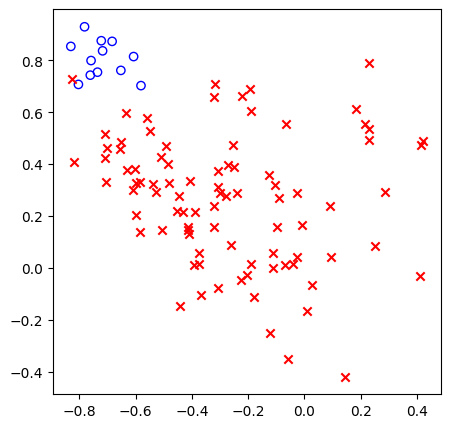

In [174]:
fig, axs = plt.subplots(figsize=(5, 5))
plus1s = np.where(y == 1)[0]
minus1s = np.where(y == -1)[0]
Xplus1s = X[plus1s, :]
Xminus1s = X[minus1s, :]
axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
            color='blue', facecolors='none', label='1')
axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
            marker='x', color='red', label='Not 1')

In [175]:
def tanh(s):
    return np.tanh(s)

def sign(s):
    return np.sign(s)

def identity(s):
    return s

In [176]:
d = [2, 2, 1]

In [177]:
def init_weights(d):
    L = len(d)
    W = [None]
    for l in range(1, L):
        W.append(np.random.rand(1+d[l-1], d[l]))
        # W.append(np.zeros((1+d[l-1], d[l])) + 0.1)
        # print(f'layer {l} weights matrix has shape {W[l].shape}')
    return W

In [178]:
W = init_weights(d)

In [179]:
def forwardNN(d, W, x, output_transform='tanh'):
    '''
    Input:
        d: list of L (no. of layers) integers specifying the neural network architecture
        W: list of weight matrices
           W[0]=None No weights for input layer, i.e., 0-th layer
           for layer l = 1, ..., L:
               W[l] is a 1+d[l-1] x d[l] 2D numpy array of real numbers
               representing the weights for the l-th layer
        x: an input data point, a d[0] x 1 2D numpy array
        output_transform: 'tanh' or 'sign', a string
    Output:
        S: list of length L
           S[0] = None
           for layer l = 1, ..., L:
               S[l] is a d[l] x 1 2D numpy array of real numbers
               representing the linear signal at the nodes of layer l
        X: list of length L
           X[0] = input x
           for layer l = 1, ..., L:
               X[l] is a 1 + d[l] x 1 2D numpy array of real numbers
               representing the outputs of the nodes of layer l
            X[L-1][1:, :] is the d[L] x 1 output of the hypothesis (neural network)
            defined by weights in input W on data point x
    '''
    L = len(d)
    # print(f'layers {L}')
    assert(x.shape == (d[0] + 1, 1))
    X = []  # Outputs of each layer
    S = [None]  # inputs to each layer
    '''
    Initialization
    '''
    X.append(x)
    '''
    Forward propagation
    '''
    for l in range(1, L):
        #Computing the Linear signals at layer l
        Sl = np.dot(W[l].T, X[l - 1])
        S.append(Sl)
        assert (S[l].shape == (d[l], 1))  # always be checking dimensionality
        '''
        Apply theta transformation to compute outputs of layer l
        You must be careful to allow the user to specify both the tanh and sign activation functions for the final layer
        Xl = ? # may need a few more lines of code
        X.append(Xl)
        assert(X[l].shape == (1+d[l], 1)) # always be checking dimensionality
        '''
        if l == L - 1 and output_transform == 'sign':
            Xl = np.sign(Sl)
        else:
            Xl = np.tanh(Sl)

        Xl = np.insert(Xl, 0, 1, axis=0)

        X.append(Xl)
        assert (X[l].shape == (1 + d[l], 1))  # always be checking dimensionality

    return S, X

In [180]:
d = [2, 2, 1]
L = len(d)

W1 = np.array([[0.25, 0.25], [0.25, 0.25], [0.25, 0.25]])
W2 = np.array([[0.25], [0.25], [0.25]])
W = [ None, W1, W2]

x = np.zeros((3, 1))
x[0, 0] = 1
x[1, 0] = 1
x[2, 0] = 2
y = 1

S, X = forwardNN(d, W, x)

for l in range(L):
    print(f'layer {l}')
    print(f'linear signal S[{l}]')
    print(S[l])
    print(f'output X[{l}]')
    print(X[l])

layer 0
linear signal S[0]
None
output X[0]
[[1.]
 [1.]
 [2.]]
layer 1
linear signal S[1]
[[1.]
 [1.]]
output X[1]
[[1.        ]
 [0.76159416]
 [0.76159416]]
layer 2
linear signal S[2]
[[0.63079708]]
output X[2]
[[1.        ]
 [0.55860082]]


In [181]:
def computeError(d, W, Xin, yin):
    '''
    Input:
        d: list of L (no. of layers) integers specifying the neural network architecture
        W: list of weight matrices
           W[0]=None No weights for input layer, i.e., 0-th layer
           for layer l = 1, ..., L:
               W[l] is a 1+d[l-1] x d[l] 2D numpy array of real numbers
               representing the weights for the l-th layer
        Xin: an N x d[0] 2D numpy array of input data points
        yin: an N x 1 2D numpy array of labels of data points in Xin
    Output:
        Ein: In-sample error of NN with weights W on dataset with data points Xin and labels yin
    '''
    L = len(d)
    N, din = Xin.shape
    assert(din == d[0]+1)
    Ein = 0
    for n in range(N):
        xn = Xin[n, :].T
        xn = np.reshape(xn, (din, 1))
        yn = yin[n, 0]
        '''
        Forward propagation
        '''
        S, X = forwardNN(d, W, xn)
        yhat = X[L-1][1, 0]
        # print(n, yn, yhat)
        Ein += (1/N)*((yhat - yn)**2)
    return Ein

In [182]:
def computeGradientNumerical(d, W, Xin, yin, tol=10**-6):
    L = len(d)
    N, din = Xin.shape
    G = [None] + [np.zeros((1+d[l-1], d[l])) for l in range(1, L)]
    for n in range(N):
        for l in range(1, L):
            for i in range(1+d[l-1]):
                for j in range(d[l]):
                    x = (Xin[n, :].T).reshape((din, 1))
                    y = yin[n, 0]
                    W_plus_tol = W
                    W_plus_tol[l][i, j] += tol
                    S, X = forwardNN(d, W_plus_tol, x, output_transform='tanh')
                    yhat = X[L-1][1, 0]
                    e_W_plus_tol = (1/N)*((yhat - y)**2)
                    W_minus_tol = W
                    W_minus_tol[l][i, j] -= tol
                    S, X = forwardNN(d, W_minus_tol, x, output_transform='tanh')
                    yhat = X[L-1][1, 0]
                    e_W_minus_tol = (1/N)*((yhat - y)**2)
                    grad = (e_W_plus_tol - e_W_minus_tol) / (2 * tol)
                    G[l][i, j] += grad
    return G

In [183]:
import numpy as np

def backwardNNsensitivity(d, W, x, y, output_transform='tanh'):
    '''
    Input:
        d: list of L (no. of layers) integers specifying the neural network architecture
        W: list of weight matrices
           W[0]=None No weights for input layer, i.e., 0-th layer
           for layer l = 1, ..., L:
               W[l] is a 1+d[l-1] x d[l] 2D numpy array of real numbers
               representing the weights for the l-th layer
        x: an input data point, a d[0] x 1 2D numpy array
        y: label of input data point x, a real number
        output_transform: 'tanh' or 'sign', a string
    Output:
        deltas: list of sensitivities of the error to the linear signals at each layer
                for layer l = 1, ..., L:
                    deltas[l] is a d[l] x 1 2D numpy array
    '''
    L = len(d)
    S, X = forwardNN(d, W, x) # forward propagation
    deltas = [None] + [np.zeros((d[l], 1)) for l in range(1, L)]

    # Initialization
    thetaprime = np.ones((d[L-1], 1))
    if output_transform == 'tanh':
        thetaprime = 1 - X[L-1][1:, :] ** 2
    assert(thetaprime.shape == (d[L-1], 1)) # always be checking dimensionality
    deltas[L-1] = (2 * (X[L-1][1:, :] - y) * thetaprime).reshape((d[L-1], 1))
    assert(deltas[L-1].shape == (d[L-1], 1)) # always be checking dimensionality

    # Backpropagation
    for l in range(L-2, 0, -1):
        thetaprime = 1 - X[l][1:, :] ** 2
        assert(thetaprime.shape == (d[l], 1)) # always be checking dimensionality
        deltas[l] = thetaprime * (W[l+1][1:, :] @ deltas[l+1])
        assert(deltas[l].shape == (d[l], 1)) # always be checking dimensionality

    return deltas


In [184]:
def computeGradientBackpropagation(d, W, Xin, yin):
    '''
    Input:
        d: list of L (no. of layers) integers specifying the neural network architecture
        W: list of weight matrices
           W[0]=None No weights for input layer, i.e., 0-th layer
           for layer l = 1, ..., L:
               W[l] is a 1+d[l-1] x d[l] 2D numpy array of real numbers
               representing the weights for the l-th layer
        Xin: an N x d[0] 2D numpy array of input data points
        yin: an N x 1 2D numpy array of labels of data points in Xin
    Output:
        Ein: In-sample error of NN with weights W on dataset with data points Xin and labels yin
        G: list of gradients for each layer
            G[0]=None
            for layer l = 1, ..., L:
                G[l] is a 1+d[l-1] x d[l] 2D numpy array of partial derivatives of e w.r.t. W[l]
    '''
    L = len(d)
    N, din = Xin.shape
    assert(din == d[0]+1)

    Ein = 0
    G = [None] + [np.zeros((1+d[l-1], d[l])) for l in range(1, L)]

    for n in range(N):
        xn = Xin[n, :].T
        xn = np.reshape(xn, (din, 1))
        yn = yin[n, 0]

        # Forward propagation
        S, X = forwardNN(d, W, xn)

        yhat = X[L-1][1, 0]

        # Backward propagation
        deltas = backwardNNsensitivity(d, W, xn, yn)

        Ein = Ein + (1/N) * (yhat - yn)**2

        # Compute gradients
        for l in range(L-1, 0, -1):
            G_l_xn = X[l-1] @ deltas[l].T
            G[l] =G[l] + G_l_xn

    return Ein, G


In [185]:
d = [2, 2, 1]
L = len(d)

W1 = np.array([[0.25, 0.25], [0.25, 0.25], [0.25, 0.25]])
W2 = np.array([[0.25], [0.25], [0.25]])
W = [None, W1, W2]

x = np.zeros((3, 1))
x[0, 0] = 1
x[1, 0] = 1
x[2, 0] = 2
y = 1

Xexp = (x.T).reshape((1, 3))
yexp = np.array(y).reshape((1, 1))


Gnumerical = computeGradientNumerical(d, W, Xexp, yexp)
Ein, Gbackprop = computeGradientBackpropagation(d, W, Xexp, yexp)

for l in range(1, L):
    print(f'layer {l}')
    print(W[l])
    print(f'gradient using numerical G[{l}] / ||G[{l}]||')
    print(Gnumerical[l]/np.linalg.norm(Gnumerical[l]))
    print(f'gradient using backpropagation G[{l}] / ||G[{l}]||')
    print(Gbackprop[l]/np.linalg.norm(Gbackprop[l]))

layer 1
[[0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]]
gradient using numerical G[1] / ||G[1]||
[[-0.28867531 -0.28867531]
 [-0.28867531 -0.28867531]
 [-0.5773501  -0.5773501 ]]
gradient using backpropagation G[1] / ||G[1]||
[[-0.28867513 -0.28867513]
 [-0.28867513 -0.28867513]
 [-0.57735027 -0.57735027]]
layer 2
[[0.25]
 [0.25]
 [0.25]]
gradient using numerical G[2] / ||G[2]||
[[-0.68040562]
 [-0.51819311]
 [-0.51819311]]
gradient using backpropagation G[2] / ||G[2]||
[[-0.68040574]
 [-0.51819303]
 [-0.51819303]]


In [186]:
Xin, yin, Xtest, ytest = splitDataSelectKRandomly(Xnorm, ycombined, 300)

print(f'Xnorm shape {Xnorm.shape} ycombined shape {ycombined.shape}\n\
X shape {Xin.shape} y shape {yin.shape}\n\
Xtest shape {Xtest.shape}, ytest shape {ytest.shape}')

Xnorm shape (9298, 3) ycombined shape (9298, 1)
X shape (300, 3) y shape (300, 1)
Xtest shape (8998, 3), ytest shape (8998, 1)


In [187]:
import torch
import matplotlib.pyplot as plt

def stochasticGradientDescent(d, Xin, yin, eta=0.01, alpha=1, beta=1, max_iters=10**6):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    dtype = torch.float32
    L = len(d)
    N, din = Xin.shape

    Eins = []
    W = init_weights(d)
    iteration = 0

    while iteration < max_iters:
        n = torch.randint(0, N, (1,), device=device)
        Xn = torch.from_numpy(Xin[n].reshape((1, din))).to(device=device, dtype=dtype)

        print('Iteration number is: ',iteration)
        # Compute Ein before update at current weights W on all N data points
        Ein_W = computeError(d, W, Xin, yin)

        # Compute gradient using backpropagation
        Ein, G = computeGradientBackpropagation(d, W, Xin, yin)

        # Initialize empty list for updated weights
        Wtmp = [None]

        # Compute updated weights on the GPU using PyTorch operations
        for Wl, Gl in zip(W[1:], G[1:]):
            updated_Wl = torch.from_numpy(Wl).to(device=device, dtype=dtype) - eta * torch.from_numpy(Gl).to(device=device, dtype=dtype)
            Wtmp.append(updated_Wl.cpu().numpy())

        # Compute Ein after update at Wtmp on all N data points
        Ein_Wtmp = computeError(d, Wtmp, Xin, yin)

        # Update weights based on the Ein comparison
        if Ein_Wtmp < Ein_W:
            W = Wtmp
            eta = eta * alpha
        else:
            eta = eta * beta

        iteration += 1
        Eins.append(Ein_Wtmp)

    # Plot the progress made
    plt.plot(range(iteration), Eins)
    plt.xlabel('# iterations')
    plt.ylabel('Ein')
    plt.show()

    return W

Streaming output truncated to the last 5000 lines.
Iteration number is:  15000
Iteration number is:  15001
Iteration number is:  15002
Iteration number is:  15003
Iteration number is:  15004
Iteration number is:  15005
Iteration number is:  15006
Iteration number is:  15007
Iteration number is:  15008
Iteration number is:  15009
Iteration number is:  15010
Iteration number is:  15011
Iteration number is:  15012
Iteration number is:  15013
Iteration number is:  15014
Iteration number is:  15015
Iteration number is:  15016
Iteration number is:  15017
Iteration number is:  15018
Iteration number is:  15019
Iteration number is:  15020
Iteration number is:  15021
Iteration number is:  15022
Iteration number is:  15023
Iteration number is:  15024
Iteration number is:  15025
Iteration number is:  15026
Iteration number is:  15027
Iteration number is:  15028
Iteration number is:  15029
Iteration number is:  15030
Iteration number is:  15031
Iteration number is:  15032
Iteration number is:  150

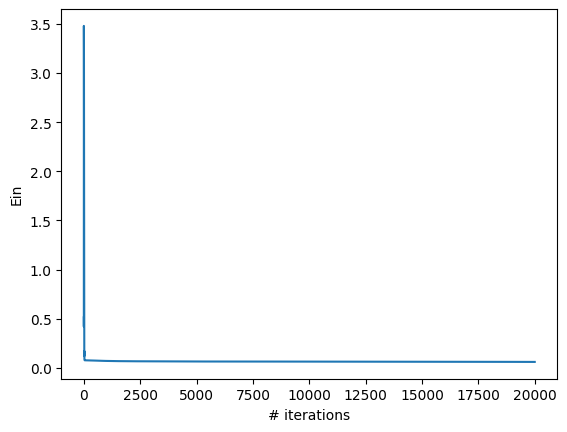

In [188]:
# architecture
d = [2, 10, 1]
W = stochasticGradientDescent(d, Xin, yin, eta=0.1, alpha=1.1, beta=0.8, max_iters=2*10**4)

In [189]:
def predictClassNN(d, W, Xtest):
    '''
    Predict class using Neural Network
    Input:
        d: list of L (no. of layers) integers specifying the neural network architecture
        W: list of weight matrices
           W[0]=None No weights for input layer, i.e., 0-th layer
           for layer l = 1, ..., L:
               W[l] is a 1+d[l-1] x d[l] 2D numpy array of real numbers
               representing the weights for the l-th layer
        # Xin: an N x d[0] 2D numpy array of input data points

    Output:
        ytest: a 2D Ntest x 1 anumpy array of predicted classes of examples in Xtest
    '''
    N, dtest = Xtest.shape
    yhat = np.zeros((N, 1))
    for n in range(N):
        xtest = Xtest[n, :].reshape((dtest, 1))
        assert(xtest.shape == (d[0]+1, 1))
        S, X = forwardNN(d, W, xtest, output_transform='sign')
        yhat[n, 0] = X[L-1][1, 0]
    return yhat

In [190]:
def plotNNSeparator(X, y, d, W, title=''):
    '''
    Plot the "effective" decision boundary and half spaces
    determined by the k Nearest Neighbors Algorithm
    Input:
        X: a 2 dimensional N x d numpy array
           The n-th row X[n, :] contains features for the n-th example in the training set
           X[n, 0], ..., X[n, d-1] have values of features
        y: a 2 dimensional N x 1 numpy array
           y[i, 0] is the label associated with the i-th example
        k: positive integer
        title: a string
    Output:
        No output
    '''
    fig, axs = plt.subplots(figsize=(10, 10))
    '''
    Plot separator
    '''
    pltx1s = np.linspace(-1, 1, 250)
    pltx2s = np.linspace(-1, 1, 250)
    pltX = np.array([[1, x, y] for x in pltx1s for y in pltx2s])
    pltyhat = predictClassNN(d, W, pltX)
    pltx1s = pltX[:, 1].reshape((pltX.shape[0], 1))
    pltx2s = pltX[:, 2].reshape((pltX.shape[0], 1))
    cmap = ListedColormap(['lightcoral', 'lightskyblue'])
    axs.scatter(pltx1s, pltx2s, c=pltyhat, cmap=cmap)
    '''
    Plot data points
    '''
    plus1s = np.where(y == 1)[0]
    minus1s = np.where(y == -1)[0]
    Xplus1s = X[plus1s, :]
    Xminus1s = X[minus1s, :]
    axs.scatter(Xplus1s[:, 1], Xplus1s[:, 2], marker='o',
                color='blue', facecolors='none', label='1')
    axs.scatter(Xminus1s[:, 1], Xminus1s[:, 2],
                marker='x', color='red', label='Not 1')
    '''
    Finishing touches
    '''
    axs.set_xlim(-1, 1)
    axs.set_ylim(-1, 1)
    axs.set_xlabel('intensity')
    axs.set_ylabel('symmetry')
    axs.set_title(title)
    axs.legend()
    plt.show()

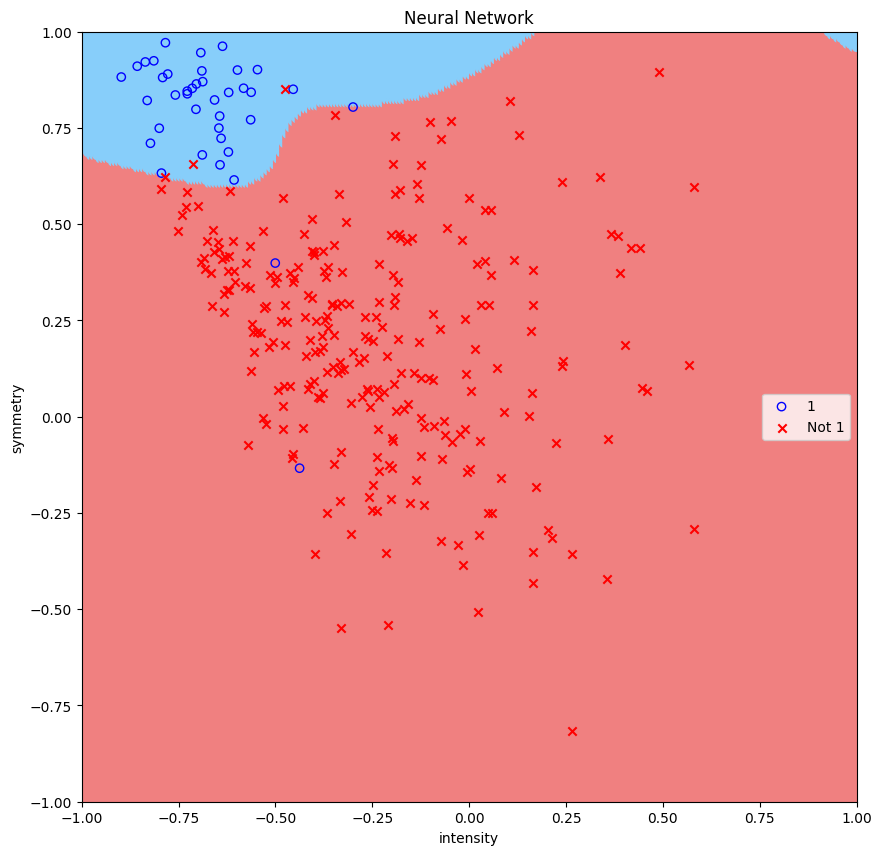

In [191]:
plotNNSeparator(Xin, yin, d, W, title=f'Neural Network')

In [201]:
def stochasticGradientDescentWithWeightDecay(d, Xin, yin, eta=0.01, lambda_val=0.01, alpha=1, beta=1, max_iters=2*10**6):
    L = len(d)
    N, din = Xin.shape
    Eins = []
    W = init_weights(d)
    iteration = 0

    while iteration < max_iters:
        n = np.random.randint(low=0, high=N)
        Xn = Xin[n, :].reshape((1, din))

        print('Iteration number is: ',iteration)
        # Compute Ein before update at current weights W on all N data points
        Ein_W = computeError(d, W, Xin, yin)

        # Compute gradient using backpropagation
        Ein, G = computeGradientBackpropagation(d, W, Xin, yin)

        # Add weight decay term to the gradient
        for l in range(1, L):
            G[l] += 2 * lambda_val * W[l]

        # Compute updated weights
        Wtmp = [None] + [Wl - eta * Gl for Wl, Gl in zip(W[1:], G[1:])]

        # Compute Ein after update at Wtmp on all N data points
        Ein_Wtmp = computeError(d, Wtmp, Xin, yin)

        if Ein_Wtmp < Ein_W:
            W = Wtmp
            eta *= alpha
        else:
            eta *= beta

        Eins.append(Ein_Wtmp)
        iteration += 1

    plt.plot(range(max_iters), Eins)
    plt.xlabel('# iterations')
    plt.ylabel('Ein')
    plt.show()

    return W

Streaming output truncated to the last 5000 lines.
Iteration number is:  15000
Iteration number is:  15001
Iteration number is:  15002
Iteration number is:  15003
Iteration number is:  15004
Iteration number is:  15005
Iteration number is:  15006
Iteration number is:  15007
Iteration number is:  15008
Iteration number is:  15009
Iteration number is:  15010
Iteration number is:  15011
Iteration number is:  15012
Iteration number is:  15013
Iteration number is:  15014
Iteration number is:  15015
Iteration number is:  15016
Iteration number is:  15017
Iteration number is:  15018
Iteration number is:  15019
Iteration number is:  15020
Iteration number is:  15021
Iteration number is:  15022
Iteration number is:  15023
Iteration number is:  15024
Iteration number is:  15025
Iteration number is:  15026
Iteration number is:  15027
Iteration number is:  15028
Iteration number is:  15029
Iteration number is:  15030
Iteration number is:  15031
Iteration number is:  15032
Iteration number is:  150

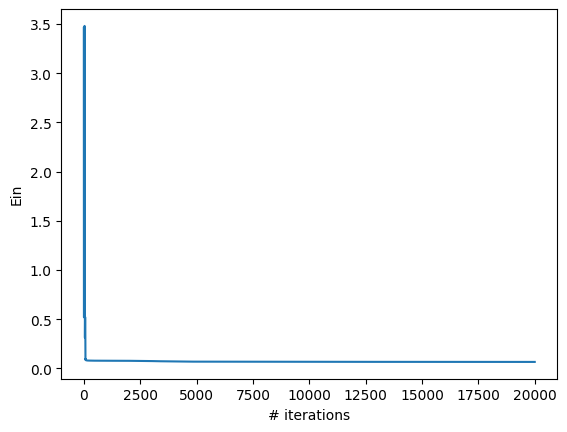

In [202]:
# architecture
d = [2, 10, 1]
W_dec = stochasticGradientDescentWithWeightDecay(d, Xin, yin, eta=0.1, alpha=1.1, beta=0.8, max_iters=2*10**4)

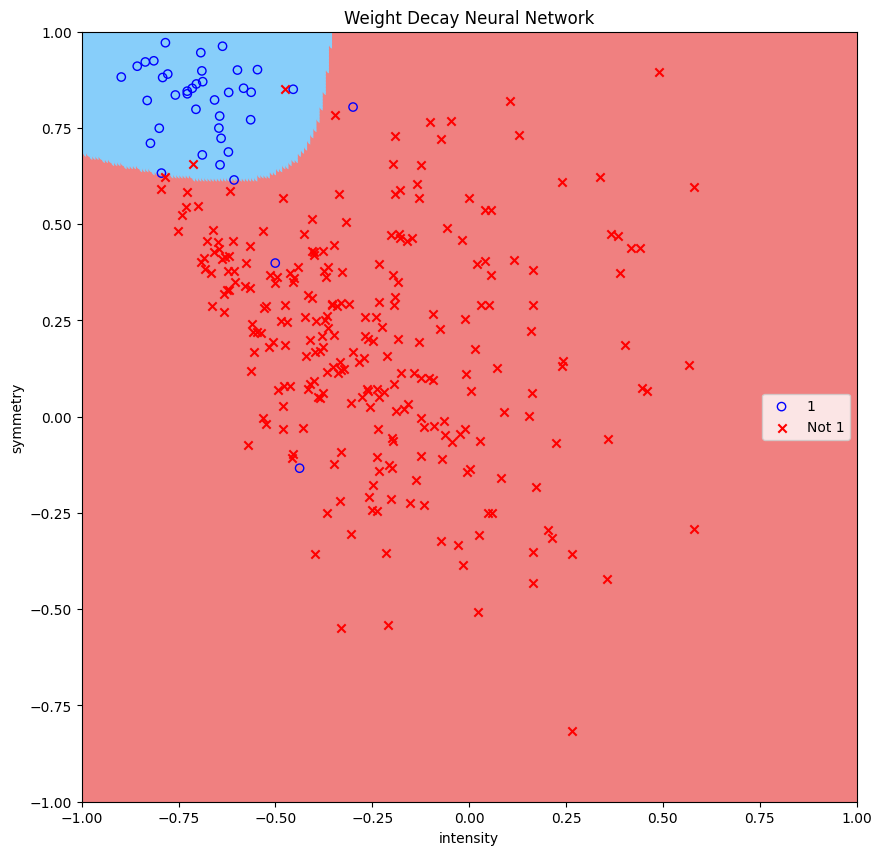

In [203]:
plotNNSeparator(Xin, yin, d, W_dec, title=f'Weight Decay Neural Network')

In [196]:
def stochasticGradientDescentWithEarlyStopping(d, Xin_train, yin_train, Xin_val, yin_val, eta=0.01, lambda_val=0.01, alpha=1, beta=1, max_iters=10**6):
    L = len(d)
    N_train, din_train = Xin_train.shape
    N_val, din_val = Xin_val.shape

    W = init_weights(d)

    best_W = None
    best_val_error = float('inf')
    consecutive_no_improvement = 0

    Eins_train = []
    Eins_val = []

    for iteration in range(max_iters):
        print('Iteration number is: ',iteration)
        n_train = np.random.randint(low=0, high=N_train)
        Xn_train = Xin_train[n_train, :].reshape((1, din_train))

        Ein_W_train = computeError(d, W, Xin_train, yin_train)

        Ein_train, G_train = computeGradientBackpropagation(d, W, Xin_train, yin_train)

        for l in range(1, L):
            G_train[l] += 2 * lambda_val * W[l]

        Wtmp_train = [None] + [Wl - eta * Gl for Wl, Gl in zip(W[1:], G_train[1:])]

        Ein_Wtmp_train = computeError(d, Wtmp_train, Xin_train, yin_train)

        Ein_val = computeError(d, Wtmp_train, Xin_val, yin_val)

        if Ein_val < best_val_error:
            best_val_error = Ein_val
            best_W = Wtmp_train
            consecutive_no_improvement = 0
        else:
            consecutive_no_improvement += 1
            if consecutive_no_improvement == 10:
                break

        if Ein_Wtmp_train < Ein_W_train:
            W = Wtmp_train
            eta *= alpha
        else:
            eta *= beta

        Eins_train.append(Ein_Wtmp_train)
        Eins_val.append(Ein_val)

    plt.plot(range(len(Eins_train)), Eins_train, label='Training Error')
    plt.plot(range(len(Eins_val)), Eins_val, label='Validation Error')
    plt.xlabel('# Iterations')
    plt.ylabel('Error')
    plt.legend()
    plt.show()

    return best_W


In [197]:
K_val = 50

# Split the data into training and validation sets
Xin_val, yin_val, Xin_train, yin_train = splitDataSelectKRandomly(Xin, yin, K_val)

Iteration number is:  0
Iteration number is:  1
Iteration number is:  2
Iteration number is:  3
Iteration number is:  4
Iteration number is:  5
Iteration number is:  6
Iteration number is:  7
Iteration number is:  8
Iteration number is:  9
Iteration number is:  10
Iteration number is:  11
Iteration number is:  12
Iteration number is:  13
Iteration number is:  14
Iteration number is:  15
Iteration number is:  16
Iteration number is:  17
Iteration number is:  18
Iteration number is:  19
Iteration number is:  20
Iteration number is:  21
Iteration number is:  22
Iteration number is:  23
Iteration number is:  24
Iteration number is:  25
Iteration number is:  26
Iteration number is:  27
Iteration number is:  28
Iteration number is:  29
Iteration number is:  30
Iteration number is:  31
Iteration number is:  32
Iteration number is:  33
Iteration number is:  34
Iteration number is:  35
Iteration number is:  36
Iteration number is:  37
Iteration number is:  38
Iteration number is:  39
Iteration 

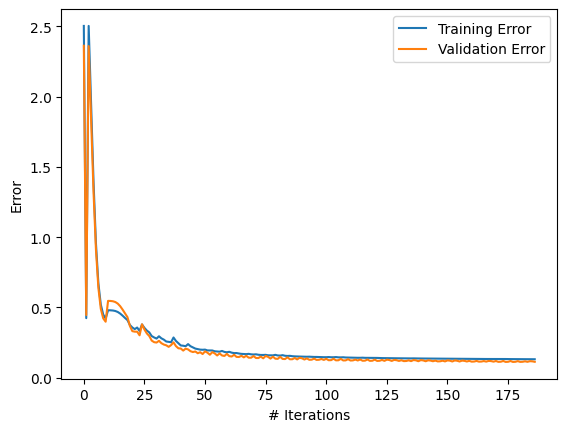

In [198]:
# architecture
d = [2, 10, 1]

# Call the function with both training and validation sets
W_with_early_stopping = stochasticGradientDescentWithEarlyStopping(d, Xin_val, yin_val, Xtest, ytest, eta=0.1, alpha=1.1, beta=0.8, max_iters=2*10**6)

In [199]:
E_test = computeError(d, W_with_early_stopping, Xtest, ytest)
print("Test Error (E_test):", E_test)

Test Error (E_test): 0.11242787565294998


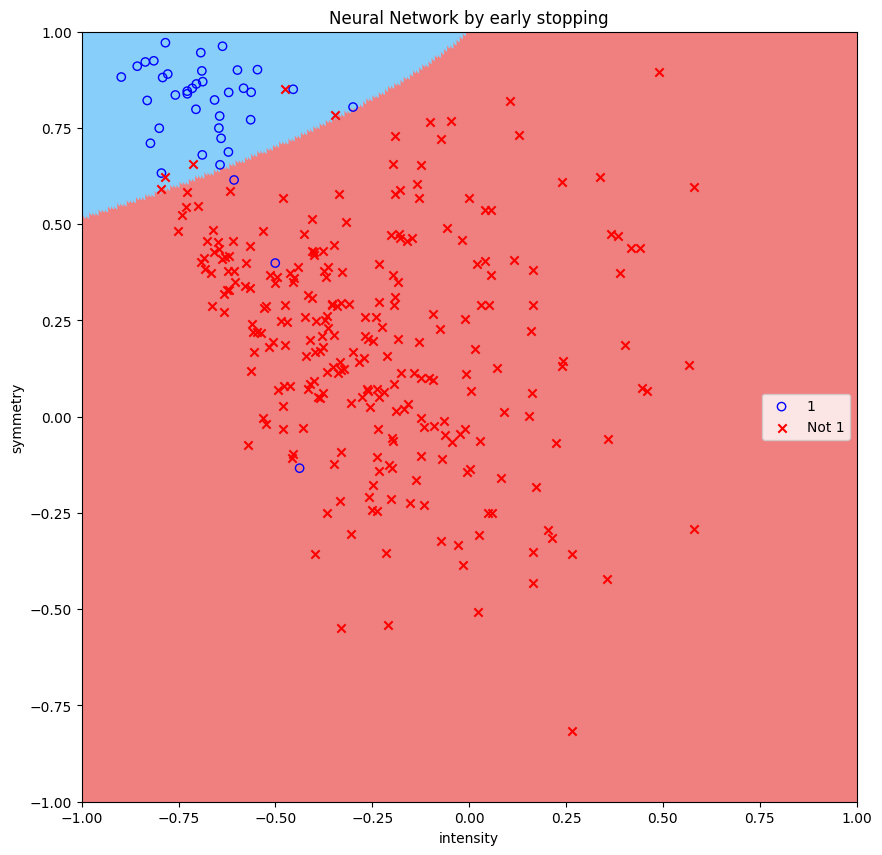

In [200]:
plotNNSeparator(Xin, yin, d, W_with_early_stopping, title=f'Neural Network by early stopping')